<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/blob/main/Proyecto_Delf%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Filtrado ===
Total original: 20,000
Muones globales: 18,881
Muones globales y |Δφ| ≥ 2.5: 14,618


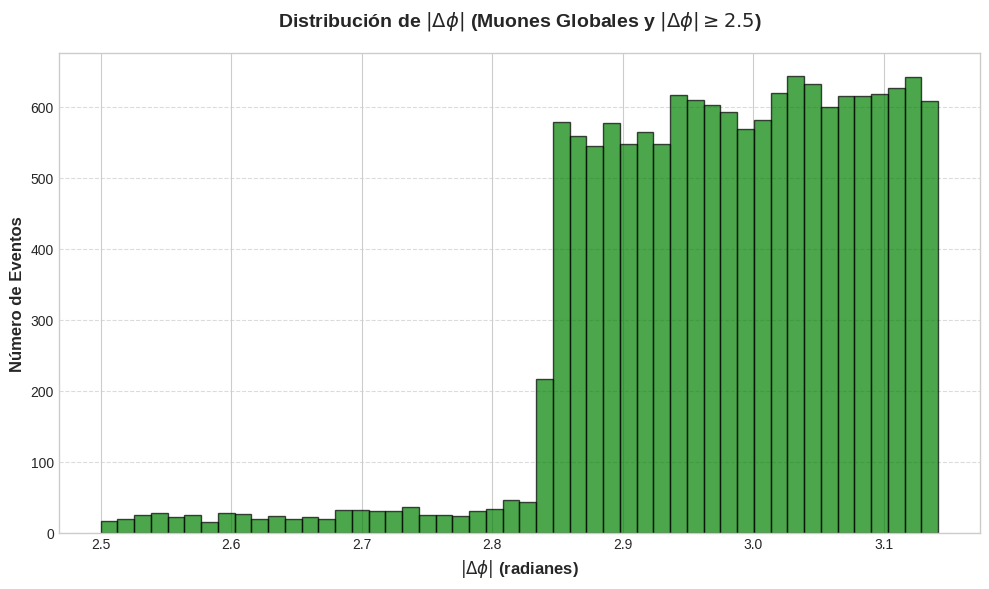


=== Estadísticas de Δφ ===
Número de eventos: 14,618
Valor mínimo de Δφ: 2.50 rad
Valor máximo de Δφ: 3.14 rad


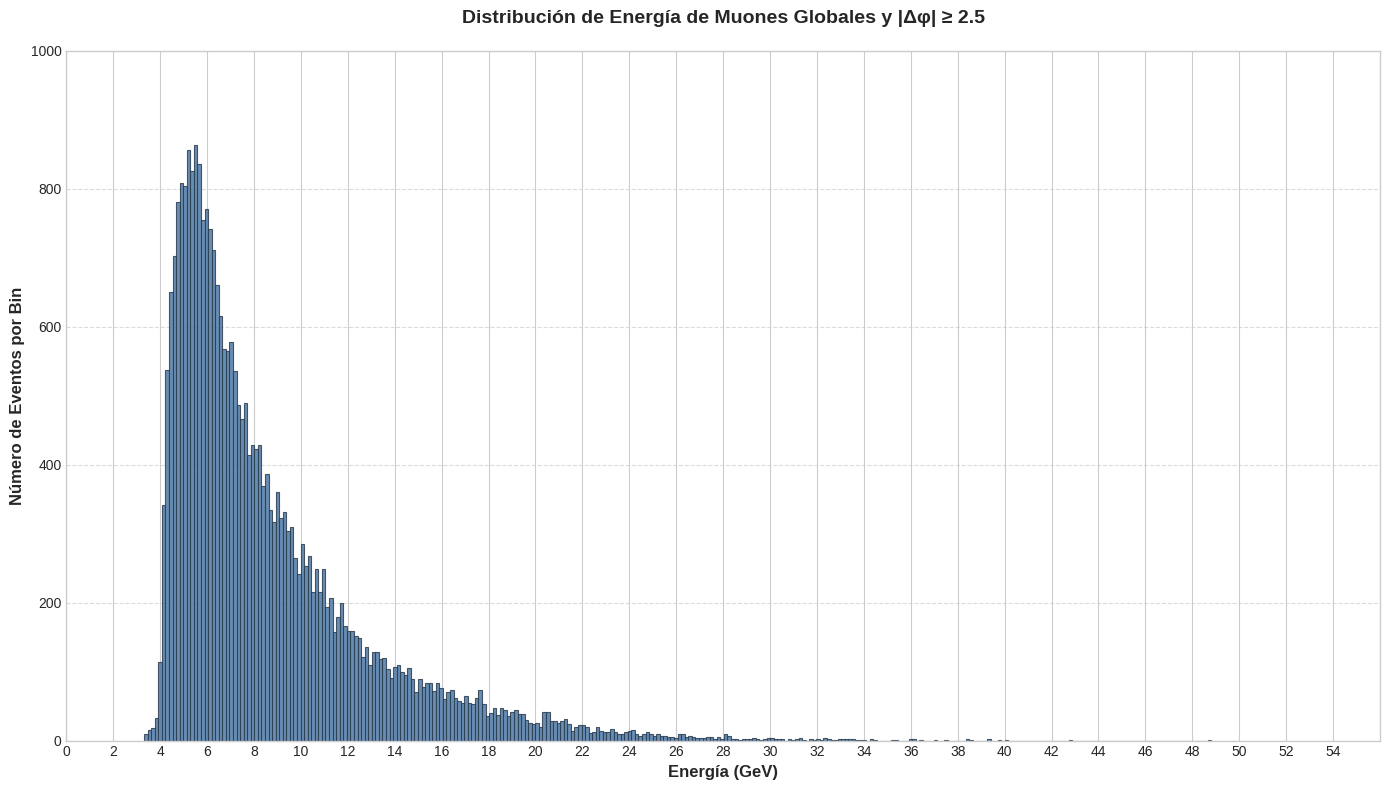


=== Estadísticas de Energía ===
Total de valores de energía: 29,236
Energía mínima: 3.32 GeV
Energía máxima: 48.80 GeV


/tmp/ipython-input-11-3971614280.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MasaInvariante'] = calcular_masa_invariante(df_filtrado)


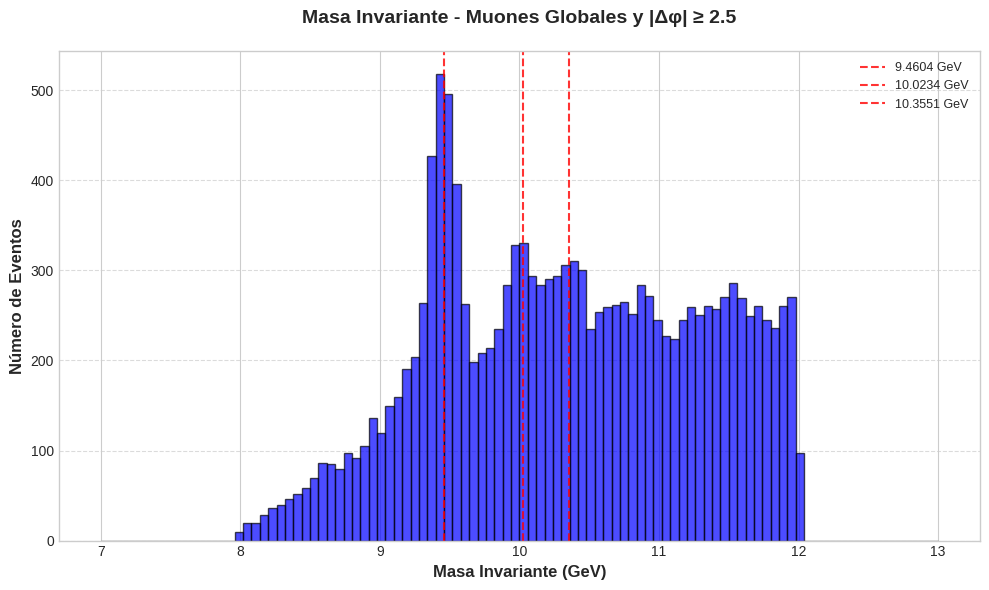


=== Estadísticas de Masa Invariante ===
Eventos: 14,618
Masa mínima: 8.00 GeV
Masa máxima: 12.00 GeV

=== Estadísticas de $p_T$ ===
Total de valores de $p_T$: 29,236
$p_T$ mínimo: 1.01 GeV
$p_T$ máximo: 14.82 GeV


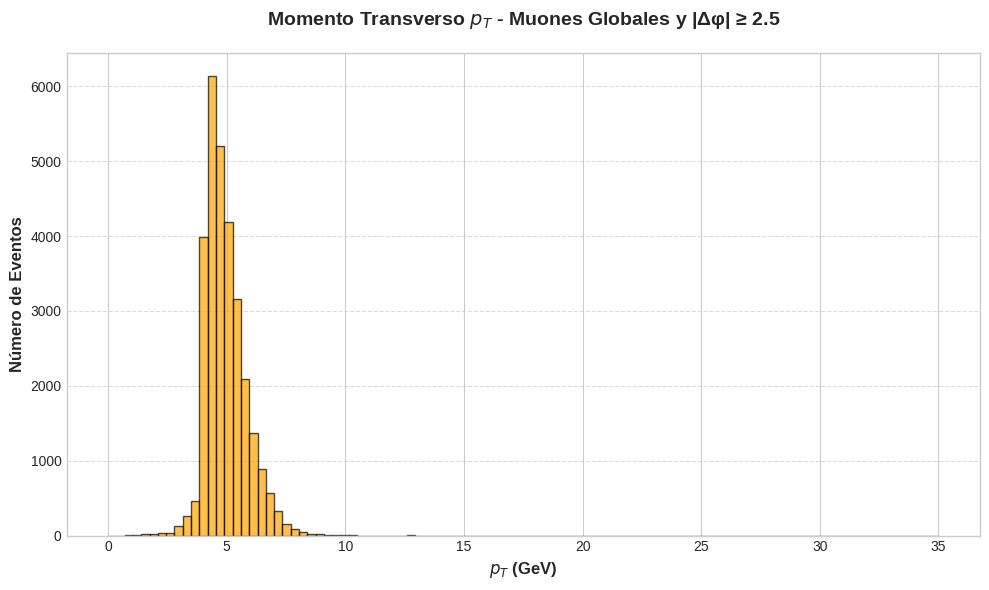

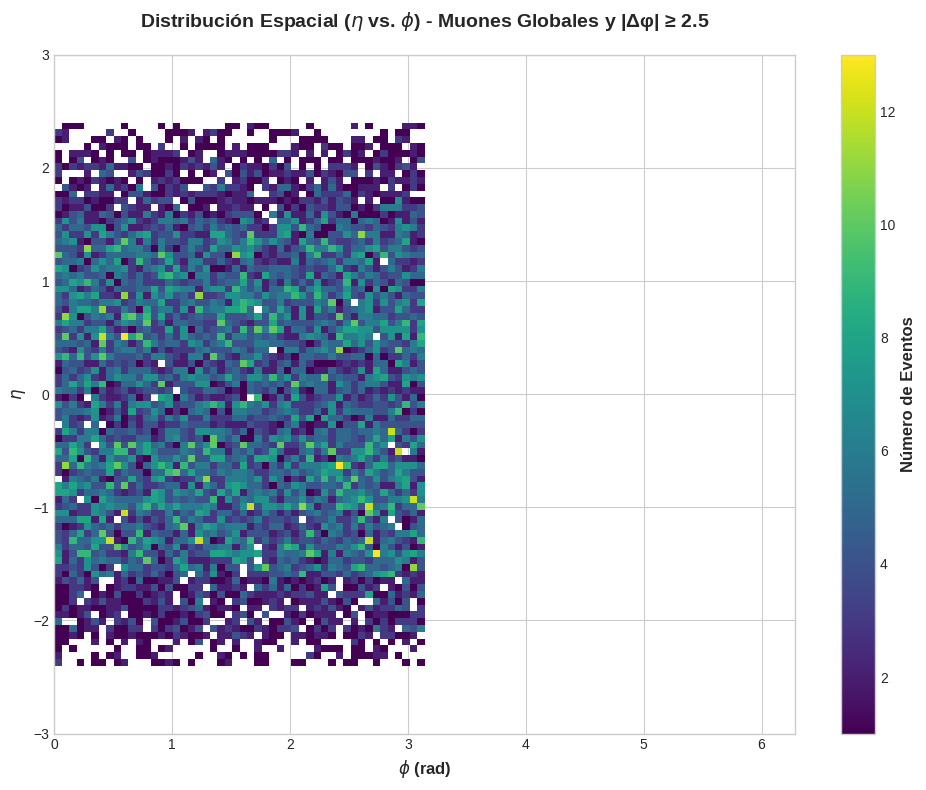


=== Estadísticas de eta y phi ===
eta: min=-2.40, max=2.40
phi: min=-3.14, max=3.14


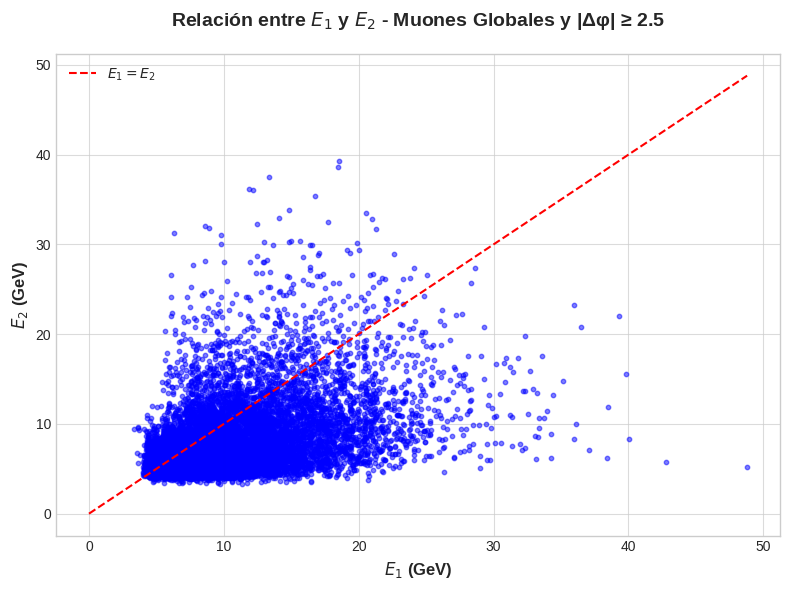


=== Estadísticas de E1 y E2 ===
E1: min=3.35 GeV, max=48.80 GeV
E2: min=3.32 GeV, max=39.31 GeV

=== Estadísticas de phi (ambos muones globales y |Δφ| ≥ 2.5 rad) ===
Número de eventos con ambos muones globales y Δφ ≥ 2.5 rad: 14,618
Número total de muones globales (de esos eventos): 29,236
Valor mínimo de phi: -3.14 rad
Valor máximo de phi: 3.14 rad


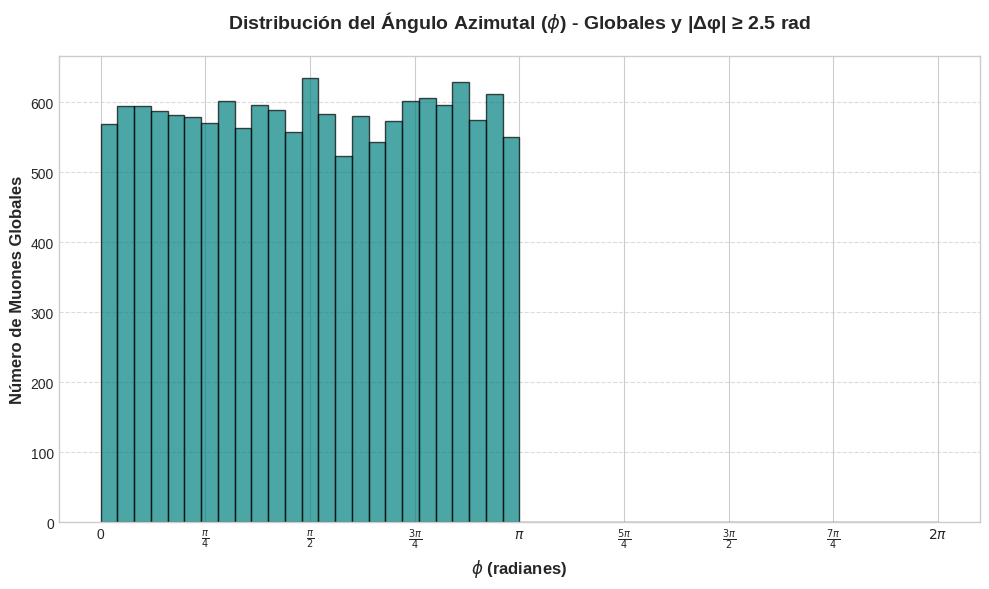


Número de eventos con cargas iguales: 0

=== Filtrado ===
Total de eventos originales: 20,000
Eventos con ambos muones globales: 18,881
Eventos con ambos muones globales y |Δφ| ≥ 2.5: 14,618


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

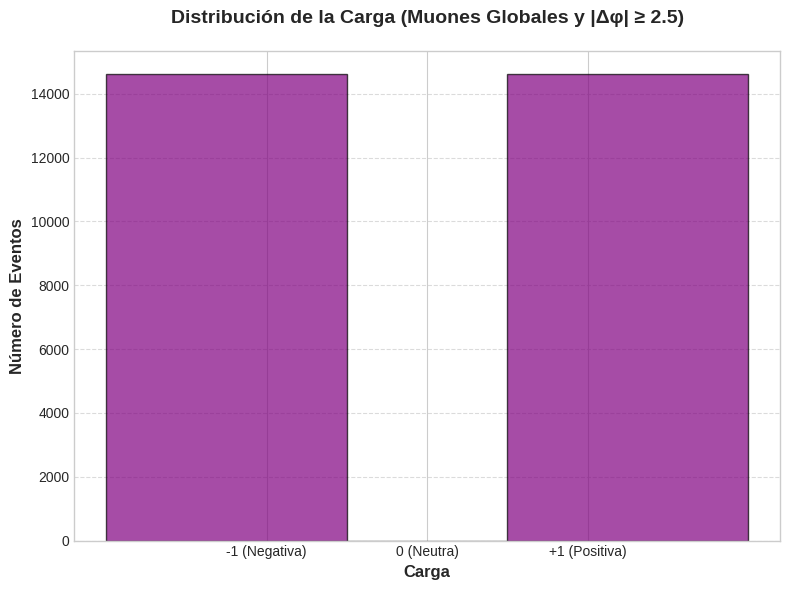


=== Distribución de la carga (muones globales y |Δφ| ≥ 2.5) ===
Número total de valores de carga: 29,236
Eventos con carga -1: 14,618
Eventos con carga 0: 0
Eventos con carga +1: 14,618


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Cargar datos
url = "https://raw.githubusercontent.com/ProgramasParaFisicaDeParticulas/blindsampleanalysiswithcsv6-Kemish12/main/Sample6.csv"
datos = pd.read_csv(url)

# 2. Filtrar ambos muones globales
df_global = datos[(datos['type1'] == 'G') & (datos['type2'] == 'G')]

# 3. Calcular delta_phi y filtrar eventos con |Δφ| ≥ 2.5
delta_phi = np.abs(df_global['phi1'] - df_global['phi2'])
delta_phi = np.where(delta_phi > np.pi, 2 * np.pi - delta_phi, delta_phi)
df_filtrado = df_global[delta_phi >= 2.5]

print(f"\n=== Filtrado ===")
print(f"Total original: {len(datos):,}")
print(f"Muones globales: {len(df_global):,}")
print(f"Muones globales y |Δφ| ≥ 2.5: {len(df_filtrado):,}")

# ===============================
# HISTOGRAMA DE Δφ
# ===============================
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.hist(delta_phi[delta_phi >= 2.5], bins=50, range=(2.5, np.pi), color='green', alpha=0.7, edgecolor='black')
plt.xlabel(r'$|\Delta \phi|$ (radianes)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title(r'Distribución de $|\Delta \phi|$ (Muones Globales y $|\Delta \phi| \geq 2.5$)', fontsize=14, pad=20, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Eventos vs delta phi globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs delta phi globales Opuestos.png')
plt.show()

print("\n=== Estadísticas de Δφ ===")
print(f"Número de eventos: {len(delta_phi[delta_phi >= 2.5]):,}")
print(f"Valor mínimo de Δφ: {delta_phi[delta_phi >= 2.5].min():.2f} rad")
print(f"Valor máximo de Δφ: {delta_phi[delta_phi >= 2.5].max():.2f} rad")

# ===============================
# HISTOGRAMA DE ENERGÍAS
# ===============================
todas_energias = pd.concat([df_filtrado['E1'], df_filtrado['E2']])
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')
plt.hist(todas_energias, bins=300, color='#4e79a7', edgecolor='#2c3e50', alpha=0.85, linewidth=0.8)
plt.ylim(0, max(1000, todas_energias.value_counts().max() * 1.2))
plt.xlim(0, 56)
plt.xticks(np.arange(0, 56, 2))
plt.xlabel('Energía (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos por Bin', fontsize=12, fontweight='bold')
plt.title('Distribución de Energía de Muones Globales y |Δφ| ≥ 2.5', fontsize=14, pad=20, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Eventos vs energía globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs energía globales Opuestos.png')
plt.show()

print("\n=== Estadísticas de Energía ===")
print(f"Total de valores de energía: {len(todas_energias):,}")
print(f"Energía mínima: {todas_energias.min():.2f} GeV")
print(f"Energía máxima: {todas_energias.max():.2f} GeV")

# ===============================
# HISTOGRAMA MASA INVARIANTE
# ===============================
def calcular_masa_invariante(df):
    E = df['E1'] + df['E2']
    px = df['px1'] + df['px2']
    py = df['py1'] + df['py2']
    pz = df['pz1'] + df['pz2']
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

df_filtrado['MasaInvariante'] = calcular_masa_invariante(df_filtrado)

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.hist(df_filtrado['MasaInvariante'], bins=100, range=(7, 13), color='blue', alpha=0.7, edgecolor='black')

masas_upsilon = [9.4604, 10.0234, 10.3551]
for masa in masas_upsilon:
    plt.axvline(x=masa, color='red', linestyle='--', linewidth=1.5, alpha=0.8, label=f'{masa:.4f} GeV')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys(), fontsize=9)

plt.xlabel('Masa Invariante (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Masa Invariante - Muones Globales y |Δφ| ≥ 2.5', fontsize=14, pad=20, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig('Eventos vs masa invariante globales Opuestos tres.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs masa invariante globales Opuestos tres.png')
plt.show()

print("\n=== Estadísticas de Masa Invariante ===")
print(f"Eventos: {len(df_filtrado):,}")
print(f"Masa mínima: {df_filtrado['MasaInvariante'].min():.2f} GeV")
print(f"Masa máxima: {df_filtrado['MasaInvariante'].max():.2f} GeV")

# ===============================
# HISTOGRAMA DE pT
# ===============================
pT_combinado = pd.concat([df_filtrado['pt1'], df_filtrado['pt2']])
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.hist(pT_combinado, bins=100, range=(0, 35), color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('$p_T$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Momento Transverso $p_T$ - Muones Globales y |Δφ| ≥ 2.5', fontsize=14, pad=20, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Eventos vs pt globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs pt globales Opuestos.png')
#plt.show()

print("\n=== Estadísticas de $p_T$ ===")
print(f"Total de valores de $p_T$: {len(pT_combinado):,}")
print(f"$p_T$ mínimo: {pT_combinado.min():.2f} GeV")
print(f"$p_T$ máximo: {pT_combinado.max():.2f} GeV")

# ===============================
# HISTOGRAMA 2D eta vs phi
# ===============================
eta_combinado = pd.concat([df_filtrado['eta1'], df_filtrado['eta2']])
phi_combinado = pd.concat([df_filtrado['phi1'], df_filtrado['phi2']])

plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-whitegrid')
hist = plt.hist2d(phi_combinado, eta_combinado, bins=[100,100], range=[[0, 2*np.pi], [-3,3]], cmap='viridis', cmin=1)
plt.colorbar(hist[3]).set_label('Número de Eventos', fontsize=12, fontweight='bold')
plt.xlabel('$\phi$ (rad)', fontsize=12, fontweight='bold')
plt.ylabel('$\eta$', fontsize=12, fontweight='bold')
plt.title('Distribución Espacial ($\eta$ vs. $\phi$) - Muones Globales y |Δφ| ≥ 2.5', fontsize=14, pad=20, fontweight='bold')
plt.tight_layout()
#plt.savefig('Eta vs phi globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('Eta vs phi globales Opuestos.png')
plt.show()

print("\n=== Estadísticas de eta y phi ===")
print(f"eta: min={eta_combinado.min():.2f}, max={eta_combinado.max():.2f}")
print(f"phi: min={phi_combinado.min():.2f}, max={phi_combinado.max():.2f}")

# ===============================
# DISPERSIÓN E1 vs E2
# ===============================
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(df_filtrado['E1'], df_filtrado['E2'], alpha=0.5, s=10, color='blue')
max_E = max(df_filtrado['E1'].max(), df_filtrado['E2'].max())
plt.plot([0, max_E], [0, max_E], color='red', linestyle='--', linewidth=1.5, label='$E_1=E_2$')
plt.xlabel('$E_1$ (GeV)', fontsize=12, fontweight='bold')
plt.ylabel('$E_2$ (GeV)', fontsize=12, fontweight='bold')
plt.title('Relación entre $E_1$ y $E_2$ - Muones Globales y |Δφ| ≥ 2.5', fontsize=14, pad=20, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.7)
plt.tight_layout()
#plt.savefig('E1 vs E2 globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('E1 vs E2 globales Opuestos.png')
plt.show()

print("\n=== Estadísticas de E1 y E2 ===")
print(f"E1: min={df_filtrado['E1'].min():.2f} GeV, max={df_filtrado['E1'].max():.2f} GeV")
print(f"E2: min={df_filtrado['E2'].min():.2f} GeV, max={df_filtrado['E2'].max():.2f} GeV")




# 2️⃣ Filtrar solo los eventos donde *ambos* muones son globales
df_globales = datos[(datos['type1'] == 'G') & (datos['type2'] == 'G')]

# Calcular la diferencia de ángulos
delta_phi = np.abs(df_globales['phi1'] - df_globales['phi2'])
# Ajustar la diferencia para que siempre sea ≤ pi (distancia mínima entre ángulos en círculo)
delta_phi = np.where(delta_phi > np.pi, 2 * np.pi - delta_phi, delta_phi)

# Filtrar eventos con |phi1 - phi2| >= 2.5 radianes
df_filtrados = df_globales[delta_phi >= 2.5]

# Combinar los valores de phi1 y phi2 de estos eventos filtrados
phi_globales = pd.concat([df_filtrados['phi1'], df_filtrados['phi2']])

# 3️⃣ Crear el histograma
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(
    phi_globales,
    bins=50,
    range=(0, 2 * np.pi),
    color='teal',
    alpha=0.7,
    edgecolor='black'
)

# Etiquetas y título
plt.xlabel('$\phi$ (radianes)', fontsize=12, fontweight='bold')
plt.ylabel('Número de Muones Globales', fontsize=12, fontweight='bold')
plt.title('Distribución del Ángulo Azimutal ($\phi$) - Globales y |Δφ| ≥ 2.5 rad', fontsize=14, pad=20, fontweight='bold')

# Etiquetas del eje x en múltiplos de π
plt.xticks(
    ticks=np.linspace(0, 2 * np.pi, 9),
    labels=['0', '$\\frac{\\pi}{4}$', '$\\frac{\\pi}{2}$', '$\\frac{3\\pi}{4}$', '$\\pi$',
            '$\\frac{5\\pi}{4}$', '$\\frac{3\\pi}{2}$', '$\\frac{7\\pi}{4}$', '$2\\pi$'],
    fontsize=10
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# 4️⃣ Estadísticas
print("\n=== Estadísticas de phi (ambos muones globales y |Δφ| ≥ 2.5 rad) ===")
print(f"Número de eventos con ambos muones globales y Δφ ≥ 2.5 rad: {len(df_filtrados):,}")
print(f"Número total de muones globales (de esos eventos): {len(phi_globales):,}")
print(f"Valor mínimo de phi: {phi_globales.min():.2f} rad")
print(f"Valor máximo de phi: {phi_globales.max():.2f} rad")


# Mostrar la gráfica

#plt.savefig('Eventos vs phi globales Opuestos.png', dpi=300, bbox_inches='tight')
#files.download('Eventos vs phi globales Opuestos.png')
plt.show()

# 2️⃣ Filtrar eventos donde ambos muones son globales
df_global = datos[(datos['type1'] == 'G') & (datos['type2'] == 'G')]

# 3️⃣ Calcular ángulo interno Δφ
delta_phi = np.abs(df_global['phi1'] - df_global['phi2'])
delta_phi = np.where(delta_phi > np.pi, 2 * np.pi - delta_phi, delta_phi)

# 4️⃣ Filtrar eventos con |Δφ| ≥ 2.5
df_filtrado = df_global[delta_phi >= 2.5]

print(f"\nNúmero de eventos con cargas iguales: {(df_filtrado['Q1'] == df_filtrado['Q2']).sum():,}")
print(f"\n=== Filtrado ===")
print(f"Total de eventos originales: {len(datos):,}")
print(f"Eventos con ambos muones globales: {len(df_global):,}")
print(f"Eventos con ambos muones globales y |Δφ| ≥ 2.5: {len(df_filtrado):,}")

# 5️⃣ Combinar las cargas Q1 y Q2 de los muones globales filtrados
cargas_combinadas = pd.concat([df_filtrado['Q1'], df_filtrado['Q2']])

# 6️⃣ Crear el histograma
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(
    cargas_combinadas,
    bins=[-2, -0.5, 0, 0.5, 2],  # Bins para -1, 0, +1
    color='purple',
    alpha=0.7,
    edgecolor='black'
)

plt.xlabel('Carga', fontsize=12, fontweight='bold')
plt.ylabel('Número de Eventos', fontsize=12, fontweight='bold')
plt.title('Distribución de la Carga (Muones Globales y |Δφ| ≥ 2.5)', fontsize=14, pad=20, fontweight='bold')

# Personalizar etiquetas del eje x
plt.xticks([-1, 0, 1], ['-1 (Negativa)', '0 (Neutra)', '+1 (Positiva)'], fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Distribución de carga globales Opuestos.png', dpi=300, bbox_inches='tight')
files.download('Distribución de carga globales Opuestos.png')
plt.show()

# 7️⃣ Estadísticas
print("\n=== Distribución de la carga (muones globales y |Δφ| ≥ 2.5) ===")
print(f"Número total de valores de carga: {len(cargas_combinadas):,}")
print(f"Eventos con carga -1: {len(cargas_combinadas[cargas_combinadas == -1]):,}")
print(f"Eventos con carga 0: {len(cargas_combinadas[cargas_combinadas == 0]):,}")
print(f"Eventos con carga +1: {len(cargas_combinadas[cargas_combinadas == 1]):,}")









